<a href="https://www.kaggle.com/code/abdulazizkomilov/simple-linear-regression?scriptVersionId=104575823" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


# **Ustunlar ta'rifi**
* ***district*** - uy joylashgan tuman
* ***rooms*** - xonalar soni
* ***size*** - uy maydoni (kv.m)
* ***level*** - uy
* ***max_levels*** - uylaring qavati

In [3]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

# Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz

In [4]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [5]:
X = housing['size'].to_numpy()
X

array([42., 65., 70., ..., 32., 70., 30.])

In [6]:
y = housing['price'].to_numpy()
y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

# Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

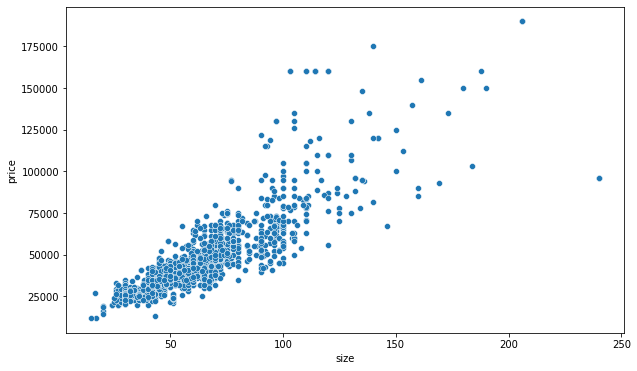

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

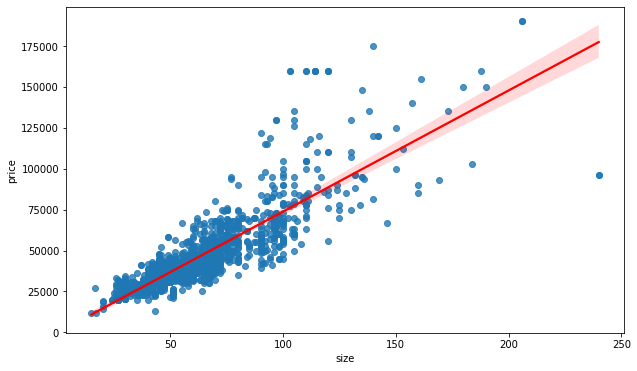

In [9]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

![](https://i.imgur.com/zZoXZxI.png)

**Bu yerda ~x - X ustun uchun o'rtracha qiymat, ~y - y ustun uchun o'rtracha qiymat**

In [10]:
Xmean = np.mean(X)
ymean = np.mean(y)

In [11]:
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
print(f"theta1={theta1}")

theta1=740.0264822713287


In [12]:
theta0 = ymean - theta1*Xmean
print(f"theta0={theta0}")

theta0=-195.94911352690542


![](https://i.imgur.com/iT5tffj.png)

In [13]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"x_test={x_test}")
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"y_test={y_test}")

x_test=[54. 42. 36. 60. 48. 68. 38. 65. 52. 44.]
y_test=[37500. 26500. 25500. 39000. 32500. 34500. 22700. 47000. 37900. 36000.]


In [14]:
y_predict = theta0 + theta1*x_test
print(f"y_predict={y_predict}")

y_predict=[39765.48092912 30885.16314187 26445.00424824 44205.63982275
 35325.3220355  50125.85168092 27925.05721278 47905.77223411
 38285.42796458 32365.21610641]


![](https://i.imgur.com/GJH9CGy.png)

![](https://i.imgur.com/aXL9iWa.png)

In [15]:
# MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"MAE={MAE}")

MAE=4140.35031634715


**MAE=4140.35031634715**

In [16]:
# RMSE
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"RMSE={RMSE}")

RMSE=5882.051673173715


**RMSE=5882.051673173715**

# Scikit-learn yordamida LR

**Keling endi yuqoridagi amallarni scikit-learn yordamida bajaramiz.**

**Avvalo ma'lumotlarni train va testga bo'lib olamiz.**

In [17]:
housing.shape

(1616, 6)

In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

In [19]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz 
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'theta1={theta1}')
print (f'theta0={theta0}')

theta1=732.7784051414766
theta0=106.31843170110369


Text(0, 0.5, 'Price')

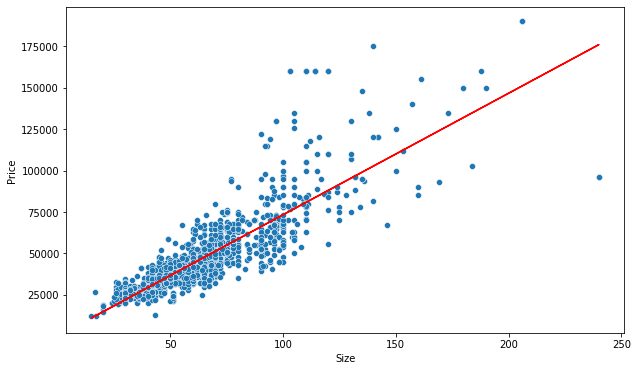

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")

# Modelni baholaymiz

In [21]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [22]:
y_predict = LR_model.predict(x_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"MAE={MAE}")
print(f"RMSE={RMSE}")

MAE=7269.709648262382
RMSE=12734.803748258666
